In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [16]:
def f_fidelity(J1, J2, N):
    ks = (2 * np.arange(0, int(N / 2)) + 1) * np.pi / N
    
    uk1s = f_uk(J1, ks)
    uk2s = f_uk(J2, ks)
    
    vk1s = f_vk(J1, ks)
    vk2s = f_vk(J2, ks)
    
    factors = uk1s * uk2s + vk1s * vk2s
    
    return np.abs(np.prod(factors))

# we define the log (lambda), following Zhou.

def f_loglam(J1, J2, N):
    ks = (2 * np.arange(0, int(N / 2)) + 1) * np.pi / N
    
    uk1s = f_uk(J1, ks)
    uk2s = f_uk(J2, ks)
    
    vk1s = f_vk(J1, ks)
    vk2s = f_vk(J2, ks)
    
    factors = np.log(np.abs(uk1s * uk2s + vk1s * vk2s))
    
    return np.sum(factors)/N

def f_ϵk(J, k):
    return np.sqrt(J ** 2 - 2 * J * np.cos(k) + 1)

def f_zk(J, k):
    return 1 - J * np.cos(k)

def f_yk(J, k):
    return J * np.sin(k)

def f_uk(J, k):
    ϵk = f_ϵk(J, k)
    zk = f_zk(J, k)
    yk = f_yk(J, k)
    
    return np.sqrt((ϵk + zk) / (2 * ϵk))

def f_vk(J, k):
    ϵk = f_ϵk(J, k)
    zk = f_zk(J, k)
    yk = f_yk(J, k)
    
    return yk / np.sqrt(2 * ϵk * (ϵk + zk))

def f_suscept(F, Js):
    deltaJ = Js[1] - Js[0]
    return (1 - F) / deltaJ ** 2

In [17]:
c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'

colors=[c3, c2, c4, c1]

No handles with labels found to put in legend.


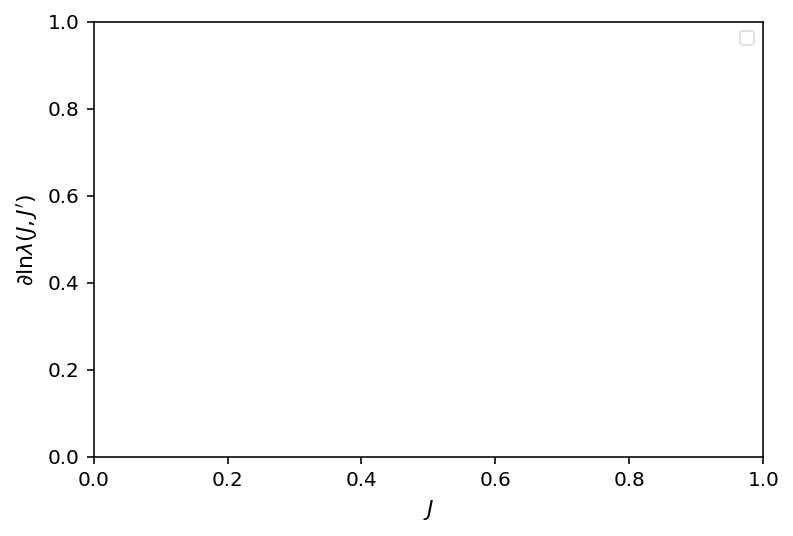

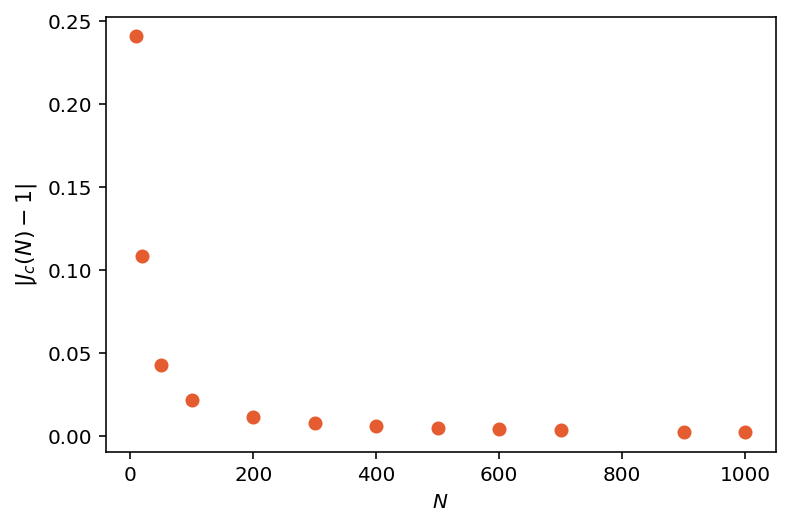

nu =  1.0041179729972805


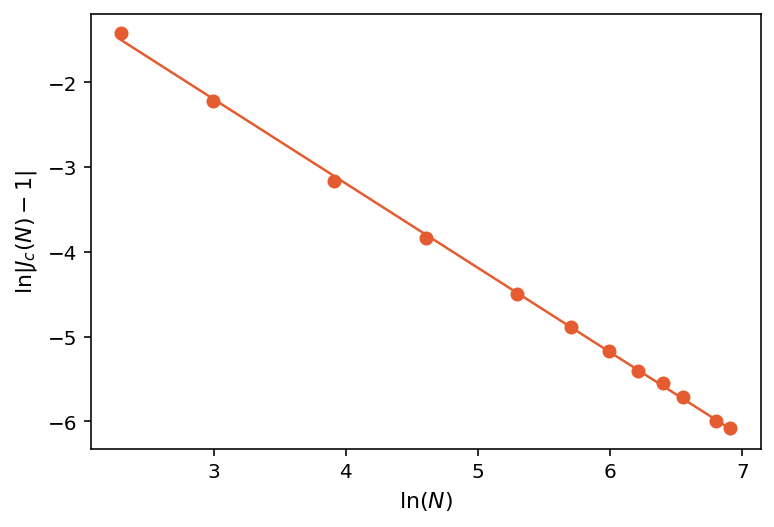

In [20]:
Js = np.linspace(0.5, 1.5, 5000)
Js_short = Js[:-1]
Ns = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 900, 1000]
#Ns = np.arange(100, 1001, 100)
Jcs = []
i=0

for N in Ns:
    fidelities = np.array([f_fidelity(Js[i], Js[i + 1], N) for i in range(len(Js) - 1)])
    suscepts = f_suscept(fidelities, Js)
    #derivatives = (suscepts[1:] - suscepts[:-1]) / (Js[1] - Js[0])
    
    loglambdas = np.array([f_loglam(Js[i], Js[-1], N) for i in range(len(Js) - 1)])
    derivatives_ll = (loglambdas[1:] - loglambdas[:-1]) / (Js[1] - Js[0])

    """if i==3:
        plt.plot(Js_short[:-1], derivatives_ll, c=colors[i], lw = '1.25', ls='dotted', label='N='+str(N))
    
    else:
        plt.plot(Js_short[:-1], derivatives_ll, c=colors[i], lw = '1.25', label='N='+str(N))"""
        
    #plt.plot(hs_short, fidelities)

    
    #para sacar los crossings
    """loglambdas = np.array([f_loglam(Js[i], Js[3780], N) for i in range(len(Js) - 1)])
    loglambdas1 = np.array([f_loglam(Js[i], Js[820], N) for i in range(len(Js) - 1)])
    
    if i==3:
        plt.plot(Js_short, loglambdas, c=colors[i], lw = 1.25, ls='dotted', label='N='+str(N))
        plt.plot(Js_short, loglambdas1, c=colors[i], lw = 1.25, ls='dotted')
    
    else: 
        plt.plot(Js_short, loglambdas, c=colors[i], lw = 1.25, label='N='+str(N))
        plt.plot(Js_short, loglambdas1, c=colors[i], lw = 1.25)  
    
    plt.legend(loc = "upper right", fontsize= 9, framealpha=0.6)
    plt.axvline(Js[3780], ls='dotted', lw=1.0, c = 'k')
    plt.axvline(Js[820], ls='dotted', lw=1.0, c = 'k')"""
    
    #plt.show()
    
   
    
    idx = np.argmax(np.abs(derivatives_ll))
    
    #idx = np.argmax(suscepts)
    Jcs.append(Js_short[:-1][idx])
    
    #para sacar fidelidad
    #plt.plot(hs_short[:-1], derivatives)
    #plt.plot(Js_short[:-1], derivatives_ll)
    #plt.plot(Js_short, fidelities, c=colors[i], lw = '1.25')
    #plt.axhline(1, ls='dotted', lw=1.0, c = 'k')
    #plt.ylim(0.99964, 1.0)
    plt.xlabel(r'$J$', fontsize=11)
    plt.ylabel(r'$F(J,J-δ)$', fontsize=11)
    #plt.show()
    
    #para sacar suscept

    """plt.plot(Js_short, suscepts, c=colors[i], lw = '1.25')
    #plt.axhline(1, ls='dotted', lw=1.0, c = 'k')
    plt.xlim(0.8, 1.2)
    plt.xlabel(r'$J$', fontsize=11)
    plt.ylabel(r'$χ_F(J)$', fontsize=11)"""
    
    i=i+1

#plt.savefig("fidelidadtfg.pdf", bbox_inches='tight')
plt.legend(loc = "upper right", fontsize= 9, framealpha=0.6)
plt.xlabel(r'$J$')
plt.ylabel(r'$\partial\ln{\lambda(J, J^{\prime}})$', fontsize=11) 
#plt.savefig("derivadatfg.pdf", bbox_inches='tight')
plt.show()
Jcs = np.array(Jcs)

Nsfile= 'dataJW/NsBenchmark'
Jcfile= 'dataJW/JsBenchmark'
np.save(Jcfile, Jcs)
np.save(Nsfile, Ns)

#plt.savefig("fidelidad"+str(N)+"tfg.pdf", bbox_inches='tight')
#plt.show()


#### normal ####
    
plt.plot(Ns, np.abs(Jcs - 1), lw = 0, marker = 'o', c=c3)
plt.xlabel(r'$N$')
plt.ylabel(r'$|J_c(N) - 1|$', fontsize=11)
#plt.savefig("benchtfg.pdf", bbox_inches='tight')
plt.show()

#### log log fit ####
logNs = np.log(Ns)
logdeltaJcs = np.log(np.abs(Jcs - 1))
plt.plot(logNs, logdeltaJcs, lw = 0, marker = 'o', c=c3)

def f_scaling1(x, Jc, ν, A):
        return A*x ** (-1 / ν)

f = lambda logN, a, ν: a - (1 / ν) * logN

popt, pcov = curve_fit(f, logNs, logdeltaJcs)

plt.plot(logNs, f(logNs, popt[0], popt[1]), c=c3, lw = 1.25)
print('nu = ', popt[1])



plt.xlabel(r'$\ln (N)$', fontsize=11)
plt.ylabel(r'$\ln |J_c(N) - 1|$', fontsize=11)
#plt.savefig("scalingtfg.pdf", bbox_inches='tight')
plt.show()

In [ ]:
np.arange(10, 1000, 100)

In [223]:
def comparingtrainings(Ns, Nsrdm, distanceintfiles, distancerdmfiles, distanceintfiles2):
    
    plt.rcParams['figure.figsize'] = 5, 4
    plt.rcParams['lines.linewidth'] = 1.8
    plt.rcParams['font.size'] = 18

    Jcsinterval = []
    Jcsrandom = []
    Jcsint2 = []
    Jsbench = np.load('dataJW/JsBenchmark.npy', allow_pickle = True)
    Nsbench = np.load('dataJW/NsBenchmark.npy', allow_pickle = True)
    
    for N, distancefile in zip(Ns, distanceintfiles):
        data = np.load(distancefile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        
        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)
        
        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
        
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsinterval.append(Jcdistance)
    
    for N, distancerdmfile in zip(Nsrdm, distancerdmfiles):
        data = np.load(distancerdmfile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsrandom.append(Jcdistance)
    print(len(Jcsrandom))
    for N, distance2file in zip(Ns, distanceintfiles2):
        data = np.load(distance2file, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsint2.append(Jcdistance)
        
    from scipy.optimize import curve_fit


    f = lambda N, a, b, ν: b+ a * N**(-1. / ν)

    popt, pcov = curve_fit(f, Ns, Jcsrandom)

    plt.plot(Nsrdm, f(Nsrdm, popt[0], popt[1], popt[2]), c=c3,)
    print('nurdm = ', popt[2])
    print('b = ', popt[1])
    print('a = ', popt[0])
    print(pcov)

    popt, pcov = curve_fit(f, Ns, Jcsinterval)

    plt.plot(Ns, f(Ns, popt[0], popt[1], popt[2]), c=c2,)
    print('nuint = ', popt[2])
    print('b = ', popt[1])
    print('a = ', popt[0])
    print(pcov)


    plt.xlabel(r'$N$' , fontsize=12)
    plt.ylabel(r'$J_c(N)$', fontsize=12)
    
    plt.plot(Nsrdm, Jcsrandom, label = 'random', c=c3,  lw = 0, marker = 'o')
    plt.plot(Ns, Jcsinterval, label = '[0.8, 0.9]&[1.2, 1.3]', c=c2, lw = 0, marker = 'o')
    plt.legend(fontsize=8, loc = "upper right", framealpha=0.3, numpoints=1)
    plt.ylim(0.994, 1.006)
    plt.xlim(500, 4500)
    plt.axhline(1, c = 'k', lw = '1', ls='dotted')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    #plt.savefig("entrenarlambdatfg.pdf", bbox_inches='tight')
    plt.show()

16
nurdm =  0.9376882342220793
b =  0.995936749173636
a =  -1.891005801093586
[[2.07086217e-02 9.06374244e-07 1.47016822e-03]
 [9.06374244e-07 4.19223355e-11 6.47580682e-08]
 [1.47016822e-03 6.47580682e-08 1.04460264e-04]]
nuint =  1.0896376541007422
b =  1.0024112484814354
a =  0.27080645504779854
[[ 4.79449743e-05  7.63595937e-09 -3.27448777e-05]
 [ 7.63595937e-09  1.26859496e-12 -5.24578411e-09]
 [-3.27448777e-05 -5.24578411e-09  2.23838120e-05]]


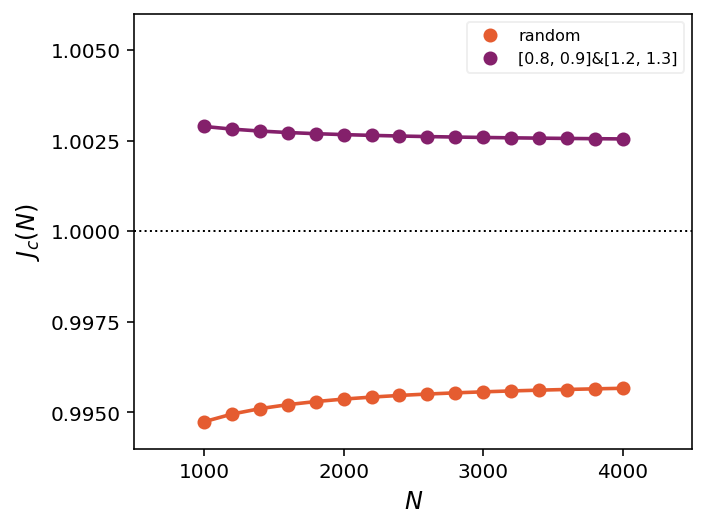

In [224]:
#KernelLambda

Ns = np.arange(1000, 4001, 200)

distanceintfiles = ['dataJW/revisited/distance_ll' + str(N) + '.npy' for N in Ns]
distancerdmfiles = ['dataJW/revisited/distance_ll_random' + str(N) + '.npy' for N in Ns]


comparingtrainings(Ns, Ns, distanceintfiles, distancerdmfiles, distanceintfiles)



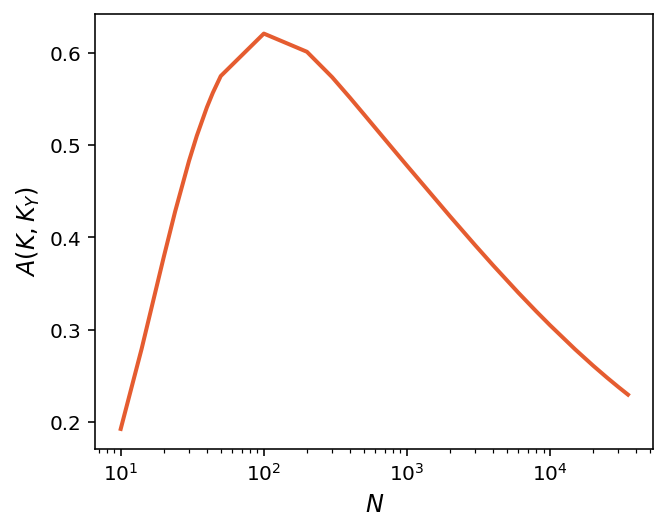

In [227]:

Ns2 = [10, 14, 20, 24, 30, 34, 40, 44, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 6000, 8000, 10000, 15000, 20000, 25000, 30000, 35000]

kernel2files =['dataJW/KernelJWrdm' + str(N) + '.npy' for N in Ns2]
distance2files = ['dataJW/distanceJWrdm' + str(N) + '.npy' for N in Ns2]
Jtrainfile= 'dataJW/Jtrainrdm.npy'
Jtrain = np.load(Jtrainfile)
Jtrain=sorted(Jtrain)
Jtrain=np.asarray(Jtrain)
Ntrain=len(Jtrain)
    
y = []
y=np.where(Jtrain<1, -1, 1)
#print(y)
A = []

for N, distance2file, kernel2file in zip(Ns2, distance2files, kernel2files):
    kernel = np.load(kernel2file, allow_pickle = True)
    data2 = np.load(distance2file, allow_pickle = True)
    Js = data2[0].tolist()
    
    k = np.empty((len(Jtrain), len(Jtrain)))
    Y = np.empty((len(Jtrain), len(Jtrain)))
    
    idx = []

    #construyo el training kernel
    for J in Js:
        if J in Jtrain:
            idx.append(Js.index(J))  
    
    for i, n in enumerate(idx, 0):
        for j, m in enumerate(idx, 0):
            k[i][j] = kernel[n][m]
            
    
    """if N==40:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernel"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()
    if N==500:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernel"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()"""

    #construyo la matriz Y
    for i, m in enumerate(y):
        for j, n in enumerate(y):
            Y[i][j] = m * n
    
    #print(k)
    #print(matrix)
    #1
    result = np.sum(Y*k) / (Ntrain*pow(np.sum(k*k),1/2))
    #print(result)
    #2
    """alignment = np.trace (np.dot(Y,k))
    result = alignment/(Ntrain*np.trace (np.dot(k,k)))
    print(result)"""
    A.append(result)
    if N==1000:
        kernel1=kernel**(1/N)
    

#print(A)


m = 500

x1 = 0.99
x2 = 1
y1 = 0.8
y2 = x1

#test_alignments(m, x1, x2, y1, y2, kernel1)

"""x1 = 0.98
x2 = 1
y1 = 0.9
y2 = x1

test_alignments(m, x1, x2, y1, y2)"""




plt.plot(Ns2, A, c=c3, lw='2', label = '$N=$'+str(N))
#plt.axhline(1 / np.sqrt(Ntrain), c = 'k' , ls='dashed', lw = 1)
plt.xscale('log')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$N$', fontsize=12)
plt.ylabel(r'$A(K, K_Y)$', fontsize=12)
#plt.savefig("alignmentrdm.pdf", bbox_inches='tight')
plt.show()